In [1]:
# Load the Drive helper and mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
# Filepaths
raw_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Raw/'
raw_train_path = raw_path + 'Train/'
raw_val_path = raw_path + 'Val/'
labels = os.listdir(raw_train_path)
raw_train_paths = []
raw_val_paths = []
for i in range(len(labels)):
  raw_train_paths.append(raw_train_path + labels[i] + '/')
  raw_val_paths.append(raw_val_path + labels[i] + '/')
  print('Num Train Imgs in category "' + labels[i] + '": ' + str(len(os.listdir(raw_train_paths[i]))))
  print('Num Val Imgs in category "' + labels[i] + '": ' + str(len(os.listdir(raw_val_paths[i]))))

processed_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Processed/'
proc_train_path = processed_path + 'Train/'
proc_val_path = processed_path + 'Val/'
proc_train_paths = []
proc_val_paths = []
for i in range(len(labels)):
  proc_train_paths.append(proc_train_path + labels[i] + '/')
  proc_val_paths.append(proc_val_path + labels[i] + '/')

Num Train Imgs in category "waffles": 542
Num Val Imgs in category "waffles": 200
Num Train Imgs in category "sushi": 577


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# preprocess image (grayscale, resize, normalize)
def preprocess(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img_gray, (128, 128), interpolation = cv2.INTER_AREA)
  img_norm = cv2.normalize(img_resize, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  return img_norm

In [ ]:
# process each dataset  
def process(raw_path, proc_path):
  img_arr = []
  for filename in os.listdir(raw_path):
    img = cv2.imread(raw_path + filename)
    final_img = preprocess(img)
    fname = filename[:-4]
    cv2.imwrite(proc_path + fname + '.jpg', final_img)
    img_arr.append(final_img)
  return img_arr

In [ ]:
from scipy import ndimage

# perform data augmentations
# pass in subset of images to be augmented
def augment(img_arr, proc_path):
  aug_arr = []
  for i in range(0, len(img_arr)):
    flip = cv2.flip(img_arr[i], 1)
    rot = ndimage.rotate(flip, 10, reshape=False)  
    cv2.imwrite(proc_path + 'augment_' + str(i) + '.jpg', rot)
    aug_arr.append(rot)
  return aug_arr

In [ ]:
# create dataset - processed images + augmented images
def create_dataset(raw_path, proc_path, train):
  # augment 100 only
  imgs = process(raw_path, proc_path)
  if (train):
    num_aug = 100
  else:
    num_aug = 25

  ind_to_aug = np.random.randint(0, len(imgs), num_aug)
  imgs_np = np.array(imgs)
  img = list(imgs_np[ind_to_aug])
  imgs = augment(img, proc_path) + imgs;
  return imgs

In [ ]:
print(len(os.listdir(proc_val_paths[0])))

200


Processed Train Img: 900 Processed Val Img: 225


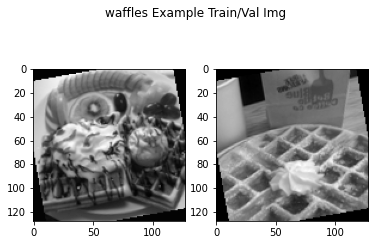

Processed Train Img: 900 Processed Val Img: 225


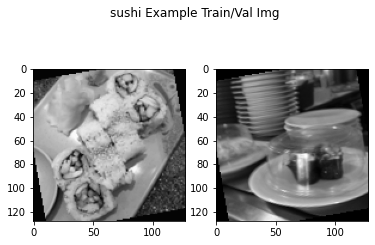

Processed Train Img: 900 Processed Val Img: 225


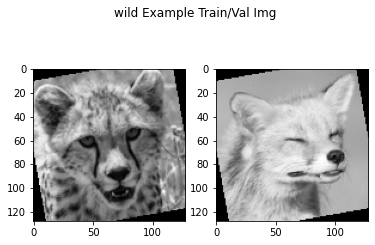

Processed Train Img: 900 Processed Val Img: 225


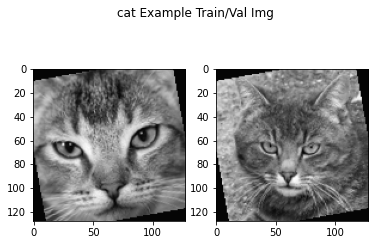

Processed Train Img: 900 Processed Val Img: 225


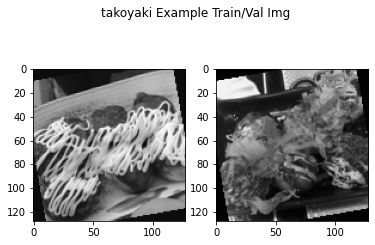

Processed Train Img: 900 Processed Val Img: 225


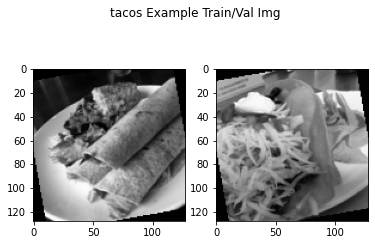

Processed Train Img: 900 Processed Val Img: 225


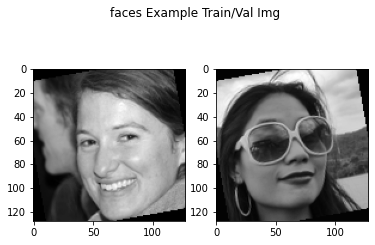

Processed Train Img: 900 Processed Val Img: 225


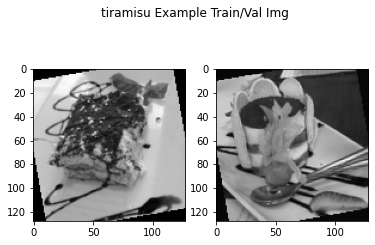

Processed Train Img: 900 Processed Val Img: 225


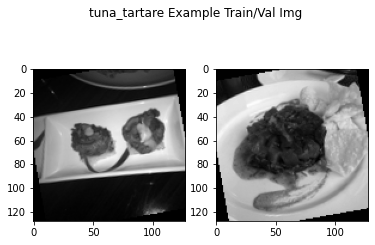

Processed Train Img: 900 Processed Val Img: 225


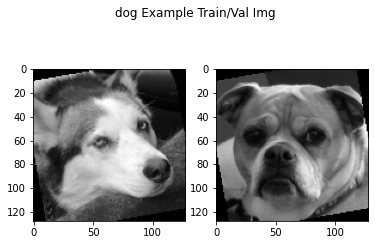

In [ ]:
for i in range(len(raw_train_paths)):
  train = create_dataset(raw_train_paths[i], proc_train_paths[i], True)
  val = create_dataset(raw_val_paths[i], proc_val_paths[i], False)
  print("Processed Train Img: " + str(len(os.listdir(proc_train_paths[i]))) + " Processed Val Img: " + str(len(os.listdir(proc_val_paths[i]))))
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle(labels[i] + ' Example Train/Val Img')
  ax1.imshow(train[0], cmap='gray')
  ax2.imshow(val[0], cmap='gray')
  plt.show()

# flickr_imgs = create_dataset(flickr_path, proc_flickr_path)